<ipython-input-1-32ea093db3cf>:72: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(F*60*60*24*7, Mag_abs, markerfmt="none", use_line_collection=True)


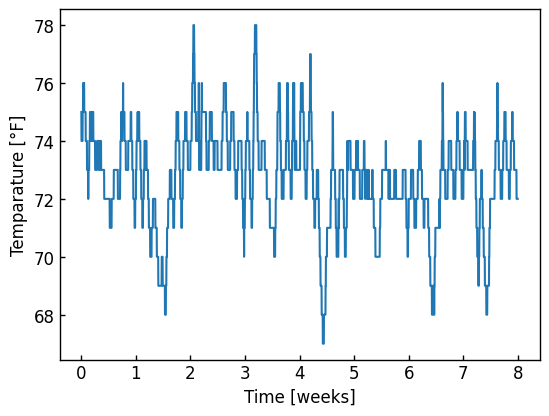

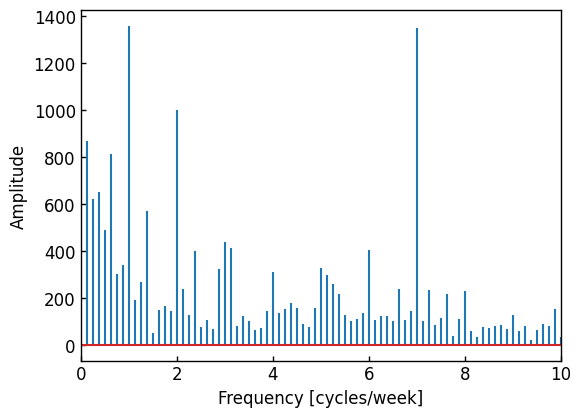

In [1]:
###########################################################################
# 理工学基礎実験B「フーリエ解析と波形の合成」
# 課題２：信号処理への応用（ビルの温度変化の解析）
#
# Original code by Prof. Takanori Uchiyama
# 2022/04/07 Modified by Takuya Tomidokoro
###########################################################################

######################## プログラムの使い方 ################################
#
# １．入力データのアップロード
#     temperature_changes.txtファイルをData/Q2フォルダから選んでアップロードする．
#     ※ファイルをアップロードしないと次のステップでエラーを吐いて止まります．
#     ※「アップロードしたファイルはランタイム時にリサイクルされます」という
#       ポップアップが出た場合はそのままOKしてください．
#
# ２．左上の実行ボタンを押す．出力されるファイルの反映にやや時間がかかるため，
#     フォルダの更新ボタン（リロードマーク付きのファルダのアイコン）を押すとよい．
#
# ３．出力されるファイル（ダブルクリックすると右側に中身を表示）
#     ① Q2_amplitude.png  : 振幅スペクトル
#     ② Q2_original.png   : 温度変化の入力データのグラフ
#
# ４．上の２つの画像をダウンロードしてレポートで使用する．
#
############################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Data loading ###
data_path = "/content/"
file_name = data_path + "temparature_changes.txt"
data = np.loadtxt(file_name)
data = np.array(data)

### Parameter settings ###
NFFT = len(data)
Fs = float(1)/float(60*30)
t = range(0,NFFT)
t = np.array(t)/Fs

### FFT ###
Mag = np.fft.fft(data,NFFT)
Mag_abs = np.abs(Mag)
Mag_abs[0] = 0
F = np.fft.rfftfreq(NFFT,1/Fs)
F = F[0:len(F)-1]
Mag_abs = Mag_abs[0:len(F)]

### Create figures ###

plt.rcParams['xtick.direction'] = 'in'  # x scale direction
plt.rcParams['ytick.direction'] = 'in'  # y scale direction
plt.rcParams['xtick.major.width'] = 1.0 # y scale line width
plt.rcParams['ytick.major.width'] = 1.0 # y scale line width
plt.rcParams['font.size'] = 12          # font size
plt.rcParams['axes.linewidth'] = 1.0    # line width
plt.rcParams['figure.subplot.left'] =   0.15 # margin %
plt.rcParams['figure.subplot.bottom'] = 0.15 # margin %

# Q2_original.png
fig1 = plt.figure()
plt.plot(t/(60*60*24*7),data)
plt.xlabel('Time [weeks]')
plt.ylabel('Temparature [°F]')
fig1.savefig(data_path + "Q2_original.png")

# Q2_amplitude.png
fig2 = plt.figure()
plt.stem(F*60*60*24*7, Mag_abs, markerfmt="none", use_line_collection=True)
plt.xlim(0,10)
plt.xlabel('Frequency [cycles/week]')
plt.ylabel('Amplitude')
fig2.savefig(data_path + "Q2_amplitude.png")
